# WEIGHTED CB + CBF

In [1]:
import matplotlib.pyplot as pyplot
%matplotlib inline 
import sys
sys.path.insert(0, '../Lab/')
import numpy as np

In [2]:
sys.path.insert(0, '../datasets/')
from load_tables import load_ICM_csr, load_URM_csr
ICM_all = load_ICM_csr()
URM_all = load_URM_csr()

Let's use the DataReader provided with the course repo

In [3]:
from Base.Evaluation.Evaluator import EvaluatorHoldout
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

In [4]:
from Notebooks_utils.data_splitter import train_test_holdout

#URM_train, URM_test = train_test_holdout(URM_all, train_perc = 0.8)
URM_train, URM_validation = train_test_holdout(URM_all, train_perc = 0.9)
evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])
#evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])

In [5]:
best_params_ItemKNNCF = {'topK': 100, 'shrink': 0.0, 'similarity': 'cosine', 'normalize': True}
best_params_ItemKNNCBF = {'topK': 100, 'shrink': 0.0, 'similarity': 'cosine', 'normalize': True}

In [6]:
from KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender


itemKNNCF = ItemKNNCFRecommender(URM_train)
itemKNNCF.fit(**best_params_ItemKNNCF)

itemKNNCBF = ItemKNNCBFRecommender(URM_train, ICM_all)
itemKNNCBF.fit(**best_params_ItemKNNCBF)

ItemKNNCFRecommender: URM Detected 21 (0.26 %) cold users.
ItemKNNCFRecommender: URM Detected 1640 (6.31 %) cold items.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 25975 ( 100 % ), 2167.12 column/sec, elapsed time 0.20 min
ItemKNNCBFRecommender: URM Detected 21 (0.26 %) cold users.
ItemKNNCBFRecommender: URM Detected 1640 (6.31 %) cold items.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 25975 ( 100 % ), 1136.97 column/sec, elapsed time 0.38 min


In [7]:
W_sparse_CF = itemKNNCF.W_sparse
W_sparse_CBF = itemKNNCBF.W_sparse

In [8]:
W_sparse_CF_sorted = np.sort(W_sparse_CF.data.copy())
W_sparse_CBF_sorted = np.sort(W_sparse_CBF.data.copy())

/Users/08volt/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


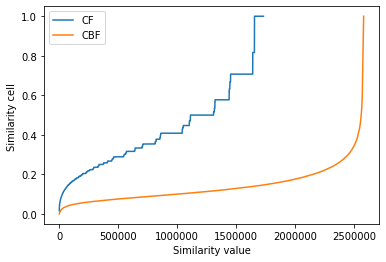

In [9]:
import matplotlib.pyplot as pyplot


pyplot.plot(W_sparse_CF_sorted, label = 'CF')
pyplot.plot(W_sparse_CBF_sorted, label = 'CBF')
pyplot.ylabel('Similarity cell ')
pyplot.xlabel('Similarity value')
pyplot.legend()
pyplot.show()

In [10]:
# Get common structure
W_sparse_CF_structure = W_sparse_CF.copy()
W_sparse_CF_structure.data = np.ones_like(W_sparse_CF_structure.data)

W_sparse_CBF_structure = W_sparse_CBF.copy()
W_sparse_CBF_structure.data = np.ones_like(W_sparse_CBF_structure.data)

W_sparse_common = W_sparse_CF_structure.multiply(W_sparse_CBF_structure)

# Get values of both in common structure of CF
W_sparse_delta = W_sparse_CBF.copy().multiply(W_sparse_common)
W_sparse_delta -= W_sparse_CF.copy().multiply(W_sparse_common)

In [11]:
W_sparse_delta_sorted = np.sort(W_sparse_delta.data.copy())

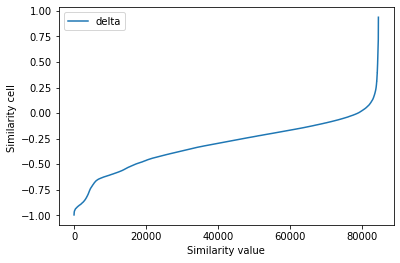

In [12]:
pyplot.plot(W_sparse_delta_sorted, label = 'delta')
pyplot.ylabel('Similarity cell ')
pyplot.xlabel('Similarity value')
pyplot.legend()
pyplot.show()

In [13]:
# How many values we have in common?

print("W_sparse_CF has {:.2E} values and {:.2f} % in common with CBF".format(W_sparse_CF.nnz, W_sparse_common.nnz/W_sparse_CF.nnz*100))
print("W_sparse_CBF has {:.2E} values and {:.2f} % in common with CF".format(W_sparse_CBF.nnz, W_sparse_common.nnz/W_sparse_CBF.nnz*100))

print("W_sparse_delta has {:.2E} values".format(W_sparse_delta.nnz))


W_sparse_CF has 1.73E+06 values and 4.88 % in common with CBF
W_sparse_CBF has 2.58E+06 values and 3.27 % in common with CF
W_sparse_delta has 8.46E+04 values


In [14]:
from load_tables import load_clustered_ICM_csr

ICM_clustered = load_clustered_ICM_csr()

In [15]:
itemKNNCBF = ItemKNNCBFRecommender(URM_train, ICM_clustered)
itemKNNCBF.fit(**best_params_ItemKNNCBF)
W_sparse_CBF = itemKNNCBF.W_sparse
W_sparse_CBF_sorted = np.sort(W_sparse_CBF.data.copy())

ItemKNNCBFRecommender: URM Detected 21 (0.26 %) cold users.
ItemKNNCBFRecommender: URM Detected 1640 (6.31 %) cold items.
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 25975 ( 100 % ), 945.08 column/sec, elapsed time 0.46 min


/Users/08volt/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


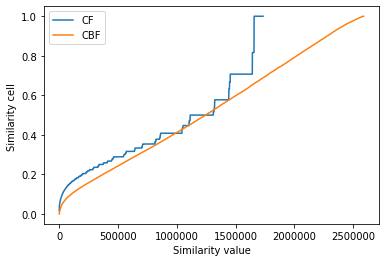

In [16]:
pyplot.plot(W_sparse_CF_sorted, label = 'CF')
pyplot.plot(W_sparse_CBF_sorted, label = 'CBF')
pyplot.ylabel('Similarity cell ')
pyplot.xlabel('Similarity value')
pyplot.legend()
pyplot.show()

In [17]:
# Get common structure
W_sparse_CF_structure = W_sparse_CF.copy()
W_sparse_CF_structure.data = np.ones_like(W_sparse_CF_structure.data)

W_sparse_CBF_structure = W_sparse_CBF.copy()
W_sparse_CBF_structure.data = np.ones_like(W_sparse_CBF_structure.data)

W_sparse_common = W_sparse_CF_structure.multiply(W_sparse_CBF_structure)

# Get values of both in common structure of CF
W_sparse_delta = W_sparse_CBF.copy().multiply(W_sparse_common)
W_sparse_delta -= W_sparse_CF.copy().multiply(W_sparse_common)
W_sparse_delta_sorted = np.sort(W_sparse_delta.data.copy())

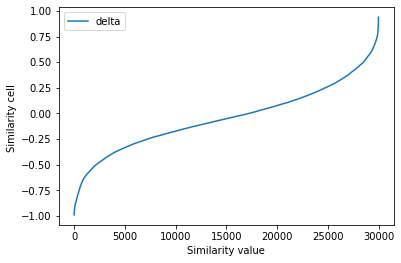

In [18]:
pyplot.plot(W_sparse_delta_sorted, label = 'delta')
pyplot.ylabel('Similarity cell ')
pyplot.xlabel('Similarity value')
pyplot.legend()
pyplot.show()

In [19]:
W_sparse_delta = W_sparse_delta.tocoo()


In [20]:
from FeatureWeighting.CFW_D_Similarity_Linalg import CFW_D_Similarity_Linalg

In [21]:
CFW_weithing = CFW_D_Similarity_Linalg(URM_train, ICM_clustered, W_sparse_CF)
CFW_weithing.fit()

CFW_D_Similarity_Linalg: URM Detected 21 (0.26 %) cold users.
CFW_D_Similarity_Linalg: URM Detected 1640 (6.31 %) cold items.
CFW_D_Similarity_Linalg: Generating train data
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 25975 ( 100 % ), 1190.59 column/sec, elapsed time 0.36 min
CFW_D_Similarity_Linalg: Collaborative S density: 2.57E-03, nonzero cells 1732670
CFW_D_Similarity_Linalg: Content S density: 1.15E-02, nonzero cells 7738126
CFW_D_Similarity_Linalg: Generating train data. Sample 3499 ( 0.05 %) 
CFW_D_Similarity_Linalg: Content S structure has 27301 out of 7738126 ( 0.35%) nonzero collaborative cells
CFW_D_Similarity_Linalg: Nonzero collaborative cell sum is: 1.24E+04, average is: 4.55E-01, average over all collaborative data is 4.23E-01
Unable to load Cython Compute_Similarity, reverting to Python
Similarity column 25975 ( 100 % ), 982.70 column/sec, elapsed time 0.44 min


In [22]:
from Base.Evaluation.Evaluator import EvaluatorHoldout

evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[5])

In [23]:
results_dict, _ = evaluator_validation.evaluateRecommender(itemKNNCF)


EvaluatorHoldout: Processed 4052 ( 100.00% ) in 3.08 sec. Users per second: 1317


In [24]:
results_dict

{5: {'ROC_AUC': 0.06007321487331359,
  'PRECISION': 0.02087857847976322,
  'PRECISION_RECALL_MIN_DEN': 0.05359904573872981,
  'RECALL': 0.050986576349334164,
  'MAP': 0.03289959690687726,
  'MRR': 0.055552813425468875,
  'NDCG': 0.04155974493519222,
  'F1': 0.029625685445347362,
  'HIT_RATE': 0.1043928923988154,
  'ARHR': 0.05869118130964127,
  'NOVELTY': 0.0029608554310341087,
  'AVERAGE_POPULARITY': 0.023488332989814245,
  'DIVERSITY_MEAN_INTER_LIST': 0.998682957153158,
  'DIVERSITY_HERFINDAHL': 0.9996872980961226,
  'COVERAGE_ITEM': 0.3511453320500481,
  'COVERAGE_ITEM_CORRECT': 0.013782483156881617,
  'COVERAGE_USER': 0.5098779413615201,
  'COVERAGE_USER_CORRECT': 0.04794261985654964,
  'DIVERSITY_GINI': 0.2050068694285651,
  'SHANNON_ENTROPY': 12.586676275651179}}

# DA QUA IN POI BISOGNA FARE LE PREVISIONI SUL TEST


In [ ]:
import time
URM_file = open(r"../datasets/data_target_users_test.csv", 'r')

URM_file.seek(0)
URM_tuples = []
URM_file.readline()#questa è importante di cristo c'è riga di introduzione
for line in URM_file:
    URM_tuples.append(line.replace("\n",""))

usersToPred = np.array(URM_tuples)
print(data)

start_time = time.time()#BUONE METRICHE PER IL TEMPO QUI
import csv

with open('outputProva.csv', mode='w',newline='') as recFile:
    
    recFile = csv.writer(recFile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    recFile.writerow(['user_id', 'item_list'])
    for user_id in usersToPred:
        rec=recommender.recommend(int(user_id), at=10)
        rec=' '.join(map(str, rec))
        #print("raccomandazioni per utente "+str(user_id)+" "+rec)
        recFile.writerow([user_id, rec])
    
end_time = time.time()
print("Ha finito in questo tempo: "+str(end_time-start_time)+" secondi")

